# 1. 소개

[Cropbox](https://github.com/cropbox/Cropbox.jl)는 작물모형 개발을 도와주는 프레임워크입니다.

In [1]:
using Cropbox

WebIO._IJuliaInit()

## 1.1. 맛보기


본격적인 실습에 들어가기 앞서 Cropbox 기반의 모형이 어떤 식으로 돌아가는지 잠깐 보여드리는 시간을 갖도록 하겠습니다.

### 1.1.1 마늘모형 (Garlic.jl)

저희 마늘모형은 원래 C++ 기반으로 개발되었다가 최근 Cropbox 기반으로 다시 구현되었습니다. 어떤 방식으로 마늘의 생육을 표현하는지 전반적인 구조나 구체적인 수식 등이 궁금하시다면 [Hsiao *et al.* (2019)](https://doi.org/10.1093/aob/mcz060) 논문을 참고하시기 바랍니다.

In [2]:
using Garlic

마늘모형은 `Garlic`이라는 이름의 패키지에 `Model`이라는 이름의 시스템(system)으로 구현되어 있습니다. Cropbox가 제공하는 `simulate()` 함수(function)를 통해 해당 시스템의 모의(simulation)을 수행할 수 있습니다. 해당 함수를 호출할 때 필요한 몇가지 매개변수(arguments)를 살펴보겠습니다.

- `config`에는 모형에 예제로 내장되어 있는 설정 중 하나를 넣어보겠습니다. 2014년 제주 온난화대응농업연구소(Research Institute of Climate Change and Agriculture; RICCA)의 노지(field)에서 측정된 남도(Namdo; ND) 마늘 실험 자료와 그에 기반한 모수가 들어있습니다.
- `stop`에는 모의를 끝내기 위한 조건을 넣어주도록 되어 있습니다. 여기서는 위의 `config`에서 지정한 시작과 끝 날짜를 기준으로 계산되는 `calendar.count`라는 값의 횟수만큼 모형이 돌아가겠습니다.
- `target`에는 모의 과정에서 저장할 변수의 이름을 넣어줄 수 있습니다. 기본적으로 들어가는 변수들(`"*"`) 외에 생물계절 관련 모듈에 들어있는 변수들(`"pheno.*"`)을 추가해보았습니다.
- `snap`에는 값을 저장하는 빈도를 지정해줄 수 있습니다. 기본인 1시간 단위로 저장하면 꽤 느리기 때문에 1일 단위로 기록해보겠습니다.



In [3]:
sim = simulate(Garlic.Model;
    config = Garlic.Examples.RCP.ND_RICCA_2014_field,
    stop   = "calendar.count",
    target = ["*", "pheno.*"],
    snap   = 1u"d",
)

Progress: 100%[===========================] Time: 0:01:01 ( 9.45 ms/it)/it)


,time,initial_leaf_ratio,potential_leaf_area_increase,shoot_carbon
,ZonedDa…,Float64,Quantit…,Quantit…
1,2014-10-01T00:00:00+09:00,0.126,0.0 cm²,0.0 g d⁻¹
2,2014-10-02T00:00:00+09:00,0.126,0.0 cm²,0.0 g d⁻¹
3,2014-10-03T00:00:00+09:00,0.126,0.0 cm²,0.0 g d⁻¹
4,2014-10-04T00:00:00+09:00,0.126,0.0 cm²,0.0 g d⁻¹
5,2014-10-05T00:00:00+09:00,0.126,0.0 cm²,0.0 g d⁻¹
6,2014-10-06T00:00:00+09:00,0.126,0.0 cm²,0.0 g d⁻¹
7,2014-10-07T00:00:00+09:00,0.126,0.0 cm²,0.0 g d⁻¹
8,2014-10-08T00:00:00+09:00,0.126,0.0 cm²,0.0 g d⁻¹
9,2014-10-09T00:00:00+09:00,0.126,0.0 cm²,0.0 g d⁻¹


처음 실행하면 조금 오래 걸릴텐데요. 일단 모의가 완료되면 그 결과가 테이블 형식의 데이터 프레임(data frame)으로 반환됩니다. 여기서는 그 내용을 `sim`이라는 이름의 변수에 저장하였습니다. 이렇게 자료가 만들어지면 파일로 저장해서 엑셀과 같은 도구로 넘긴다든지, 아니면 Julia의 여러 패키지를 이용한다든지, 혹은 Python이나 R과 같은 언어를 직접 호출하는 등의 여러가지 방법으로 분석이 가능해집니다. 하지만 여기서는 Cropbox가 기본으로 제공하는 시각화 함수 `visualize()`를 이용하여 몇가지 간단한 그래프를 그려보도록 하겠습니다.

우선 시간(time)에 따른 출엽수(leaf appearance)를 나타내는 계단형(step) 그래프입니다.

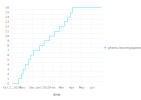

In [4]:
visualize(sim, :time, "pheno.leaves_appeared"; kind = :step)

그 다음에는 모형 구동 결과를 비교하기 위한 실제 실험 자료를 불러오겠습니다. 마늘모형 패키지에 내장되어 있는 예제를 그대로 사용합니다.

In [5]:
using CSV
using DataFrames

obs = CSV.read(Garlic.datapath("Korea/ricca_2014_field.csv"), DataFrame) |> unitfy

,cultivar,planting_date,measuring_date,plant_height,bulb_diameter,bulb_height
,String3,Date,Date,Quantit…,Quantit…,Quantit…?
1,ND,2014-10-08,2015-01-16,61.4 cm,17.8 mm,missing
2,ND,2014-10-08,2015-01-16,53.6 cm,22.1 mm,missing
3,ND,2014-10-08,2015-01-16,58.2 cm,18.8 mm,missing
4,ND,2014-10-08,2015-01-16,60.2 cm,19.0 mm,missing
5,ND,2014-10-08,2015-01-16,56.1 cm,19.9 mm,missing
6,ND,2014-10-08,2015-01-16,63.3 cm,24.9 mm,missing
7,ND,2014-10-08,2015-01-16,62.6 cm,21.2 mm,missing
8,ND,2014-10-08,2015-01-16,57.5 cm,19.7 mm,missing
9,ND,2014-10-08,2015-01-16,59.5 cm,22.3 mm,missing


모형으로 계산한 녹엽면적(green leaf area)을 선으로 그린 다음, 실측 자료는 점으로 찍어보겠습니다.

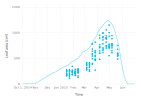

In [6]:
p = visualize(sim, :time, :green_leaf_area;
    kind = :line,
    ylim = (0, 1500),
    xlab = "Time",
    ylab = "Leaf area",
    name = "",
)
visualize!(p, obs, :measuring_date, :leaf_area; name = "", color = 1)

같은 방식으로 이번에는 마늘의 각 부위별 생체중을 비교해보도록 하겠습니다.

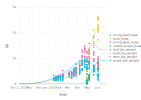

In [7]:
p = visualize(sim, :time, [:living_leaf_mass, :bulb_mass, :living_stalk_mass, :visible_scape_mass];
    kind = :line,
    ylim = (0, 30),
)
visualize!(p, obs, :measuring_date, [:leaf_dry_weight, :bulb_dry_weight, :stem_dry_weight, :scape_dry_weight];
    colors = [1, 2, 3, 4],
)

처음에 잠깐 보았던 출엽수(leaf appearance)를 엽 생장단계에 따라 보다 상세히 표시해보겠습니다.

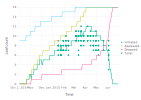

In [8]:
p = visualize(sim, :time, :leaves_initiated;
    kind = :line,
    ylim = (0, 16),
    xlab = "Time",
    ylab = "Leaf count",
    name = "Initiated",
)
visualize!(p, sim, :time, [:leaves_appeared, :leaves_dropped, :leaves_fresh];
    kind = :line,
    names = ["Appeared", "Dropped", "Total"],
)
visualize!(p, obs, :measuring_date, :leaf_count; name = "", color = 4)

조금 더 나아가, 모수(parameter)를 바꿔가면서 민감도 분석(sensitivty analysis)을 수행할 수도 있습니다. 여기서는 최장엽의 최소 길이(minimum length of longest leaf; `LM_min`)를 조정해보겠습니다.

In [9]:
p = visualize(obs, :measuring_date, :leaf_area)
visualize!(p, Garlic.Model, :time, :green_leaf_area;
    config, stop, snap,
    group = :Leaf => :LM_min => [60, 70, 80, 90],
    kind = :line,
)

LoadError: UndefVarError: config not defined

이처럼 Cropbox 기반으로 만들어진 모형은 몇가지 함수만을 이용하여 여러가지 모의를 비교적 간단히 수행할 수 있다는 장점이 있습니다. 사실 마늘모형 자체는 꽤 복잡한 구조로 구성되어 있습니다만, 모형을 사용하는 입장에서는 굳이 내부를 자세히 알지 않아도 되는 것이지요.

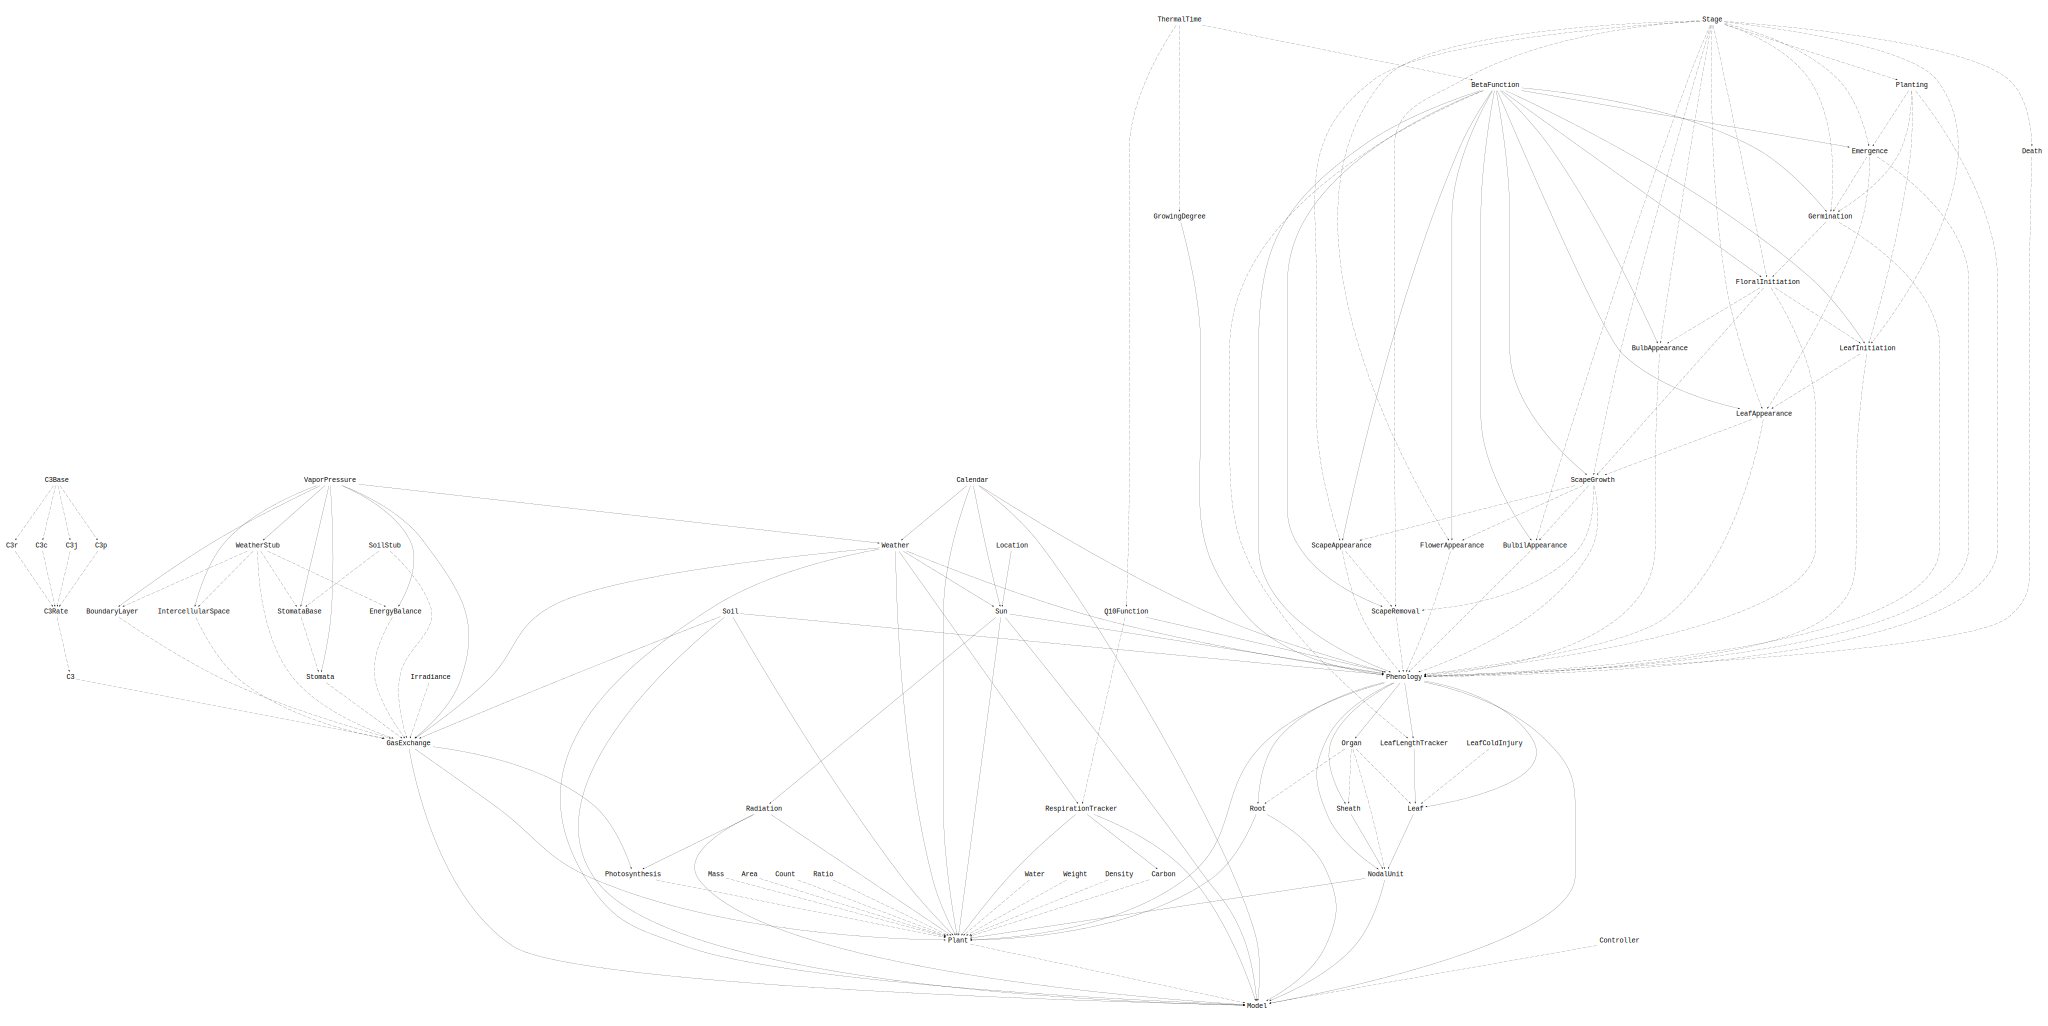

In [10]:
Cropbox.hierarchy(Garlic.Model; skipcontext = true)

## 1.2. 예제

Cropbox로 만든 모형을 사용해보았으니, 이제 모형을 어떻게 만드는지 살펴보기 위해 아주 간단한 모형으로 시작하겠습니다. 시간의 흐름에 따라 S자 곡선 형태의 생체량(biomass)이 누적되는 로지스틱(logistic) 생장 모형을 생각해봅시다.

### 1.2.1. 수식

$$
\begin{align}
\frac{dW}{dt} &= rW(1-\frac{W}{W_f}) \\
W_{t = 0} &= W_0
\end{align}
$$

| 이름 | 값 | 단위 | 설명 |
| :- | :- | :- | :- |
| $$r$$ | ? | ? | 상대생장률 (relative growth rate) |
| $W_f$ | ? | ? | 잠재적인 최종 생체량 |
| $W_0$ | ? | ? | 최초 생체량 |
| $W$ | - | ? | 시간별 생체량 (상태변수; state variable) |
| $t$ | - | ? | 시간 |

### 1.2.2. 설명

로지스틱(logitic) 생장을 하는 **시스템 (system)**은 아래와 같은 변수로 구성된다.
 - **r** (생장률; growth rate): 모의(simulation)가 진행되는 동안 값이 변하지 않고 *보존(preserve)*되는 모수(parameter)
 - **Wf** (최종 생체량; final biomass): 위와 같이 값이 한번 정해지면 바뀌지 않는 모수(parameter)
 - **W0** (최초 생체량; initial biomass): 또 다른 모수(parameter)
 - **W** (생체량; biomass): 초기값 **W0**에서 부터 시간의 흐름에 따라 *적분(integrate)*되는 상태변수
 - **t** (시간; time): 적분의 기준이 되는 시간

### 1.2.3. 명세

Cropbox에서 모형을 구현하기 위해서는 해당 모형의 명세(specification)를 만들어주어야 합니다. 이러한 명세는 위의 수식과 설명에서 중요한 키워드만 뽑아 정리해놓은 형식으로 구성되어 있습니다. 이때 `@system` 매크로를 사용합니다.

In [11]:
@system Logistic1(Controller) begin
    r:  growth_rate     ~ preserve(parameter)
    Wf: final_biomass   ~ preserve(parameter)
    W0: initial_biomass ~ preserve(parameter)

    W(W, r, Wf): biomass => begin
        r * W * (1 - W / Wf)
    end ~ accumulate(init = W0)

    t(context.clock.tick): time ~ track
end

Logistic1

그럼 이제 어떻게 하면 이 명세를 실제 구동할 수 있는지 알아보겠습니다.

## 1.3. 모의 (Simulation)

사실 위에서 만든 모형 명세만으로는 아직 실제 모의를 수행할 수가 없습니다. 왜냐하면 모수값이 빠져 있기 때문입니다. 모수를 지정하는 것은 모형을 구동할 때 반드시 선행되어야 하는 부분인데 일단은 쉬운 방법으로 접근해보겠습니다. 모수의 단위 역시 중요한 역할을 하지만 일단은 깊이 생각하지 않도록 하겠습니다.

| 이름 | 값 | 단위 | 설명 |
| :- | :- | :- | :- |
| $r$ | 0.05 | $$\%$$ | 상대생장률 (relative growth rate) |
| $$W_f$$ | 300 | ? | 잠재적인 최종 생체량 |
| $W_0$ | 0.25 | ? | 최초 생체량 |
| $W$ | - | ? | 시간별 생체량 (상태변수; state variable) |
| $t$ | - | ? | 시간 |

그럼 모수 값을 넣어서 다시 한번 명세를 적어봅시다.

In [12]:
@system Logistic2(Controller) begin
    r:  growth_rate     => 0.05 ~ preserve(parameter)
    Wf: final_biomass   => 300  ~ preserve(parameter)
    W0: initial_biomass => 0.25 ~ preserve(parameter)

    W(W, r, Wf): biomass => begin
        r * W * (1 - W / Wf)
    end ~ accumulate(init = W0)

    t(context.clock.tick): time ~ track
end

Logistic2

이렇게 만들어진 명세는 `simulate()` 함수를 이용하여 구동할 수 있습니다. 모의(simulation) 과정에는 정해진만큼 내부적으로 시간이 흐르게 되며, 각 시간 단위(time step)마다 변수 값들을 갱신하게 됩니다. 각 변수가 어떻게 갱신되는지는 해당 변수의 종류에 따라 결정됩니다. 예를 들어 `preserve` 계통의 변수라면 의미 그대로 갱신할 필요 자체가 없을 것이고, `accumualte` 계통의 변수라면 시간이 흐른 만큼 적분을 수행하여 값을 바꿔줍니다. 우선, 300번의 시간 단위만큼 모의를 진행해보겠습니다.

In [13]:
sim2 = simulate(Logistic2; stop = 300)

,time,r,Wf,W0,W,t
,Quantit…,Float64,Float64,Float64,Float64,Float64
1,0.0 hr,0.05,300.0,0.25,0.25,0.0
2,1.0 hr,0.05,300.0,0.25,0.26249,1.0
3,2.0 hr,0.05,300.0,0.25,0.275603,2.0
4,3.0 hr,0.05,300.0,0.25,0.28937,3.0
5,4.0 hr,0.05,300.0,0.25,0.303825,4.0
6,5.0 hr,0.05,300.0,0.25,0.319,5.0
7,6.0 hr,0.05,300.0,0.25,0.334934,6.0
8,7.0 hr,0.05,300.0,0.25,0.351661,7.0
9,8.0 hr,0.05,300.0,0.25,0.369224,8.0


결과를 확인해보겠습니다. X축은 시간(`t`), Y축은 생장량(`W`)인 선(line) 그래프입니다.

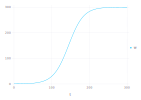

In [14]:
visualize(sim2, :t, :W; kind = :line)

예상했던 S자 곡선 형태의 생장량 변화가 보이나요?

## 1.4. 단위 (Units)

원했던 모양은 나왔지만 위에서 넣어준 모수 값 그리고 해당 변수의 단위가 명확하지는 않은 상태입니다. 예를 들어 300시간인지 300일인지, 100$\mathrm{g}$인지, 100$\mathrm{kg}$인지 알 수 없지요. 이렇게 모호한 단위는 모형을 개발할 때 맞닥뜨리는 오류의 많은 비중을 차지하기도 합니다. 그렇기 때문에 Cropbox에서 모형의 명세를 만들 때에는 단위를 명시해주도록 권장하고 있습니다. 이제 단위를 정해봅시다.

| 이름 | 값 | 단위 | 설명 |
| :- | :- | :- | :- |
| $r$ | 0.05 | $$\mathrm{g}\ \mathrm{g^{-1}}\ \mathrm{d^{-1}}$$ | 상대생장률 (relative growth rate) |
| $$W_f$$ | 300 | $\mathrm{g}$ | 잠재적인 최종 생체량 |
| $W_0$ | 0.25 | $\mathrm{g}$ | 최초 생체량 |
| $W$ | - | $\mathrm{g}$ | 시간별 생체량 (상태변수; state variable) |
| $t$ | - | $\mathrm{d}$ | 시간 |

In [15]:
@system Logistic3(Controller) begin
    r:  growth_rate     => 0.05 ~ preserve(parameter, u"g/g/d")
    Wf: final_biomass   => 300  ~ preserve(parameter, u"g")
    W0: initial_biomass => 0.25 ~ preserve(parameter, u"g")

    W(W, r, Wf): biomass => begin
        r * W * (1 - W / Wf)
    end ~ accumulate(init = W0, u"g")

    t(context.clock.time): time ~ track(u"d")
end

Logistic3

In [16]:
sim3 = simulate(Logistic3; stop = 300u"d")

,time,r,Wf,W0,W,t
,Quantit…,Quantit…,Quantit…,Quantit…,Quantit…,Quantit…
1,0.0 hr,0.05 d⁻¹,300.0 g,0.25 g,0.25 g,0.0 d
2,1.0 hr,0.05 d⁻¹,300.0 g,0.25 g,0.25052 g,0.0416667 d
3,2.0 hr,0.05 d⁻¹,300.0 g,0.25 g,0.251042 g,0.0833333 d
4,3.0 hr,0.05 d⁻¹,300.0 g,0.25 g,0.251564 g,0.125 d
5,4.0 hr,0.05 d⁻¹,300.0 g,0.25 g,0.252088 g,0.166667 d
6,5.0 hr,0.05 d⁻¹,300.0 g,0.25 g,0.252613 g,0.208333 d
7,6.0 hr,0.05 d⁻¹,300.0 g,0.25 g,0.253139 g,0.25 d
8,7.0 hr,0.05 d⁻¹,300.0 g,0.25 g,0.253666 g,0.291667 d
9,8.0 hr,0.05 d⁻¹,300.0 g,0.25 g,0.254194 g,0.333333 d


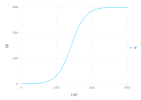

In [17]:
visualize(sim3, :t, :W; kind = :line)

### 1.4.1. 단위 검증

명세에 들어가는 단위는 그저 보기에만 좋으라고 넣는 것이 아닙니다. 변수에 단위가 붙어 있다면 수식을 넣을 때 변수를 빼먹는 등의 단순한 실수를 하거나 아니면 수식 자체에 논리적인 오류가 있는 경우를 쉽게 찾아낼 수 있습니다. 아래 예제에서는 생체량(`W`)를 계산하는 수식에서 최종 생체량(`Wf`)로 나눠주는 부분을 누락하는 실수를 했습니다. 이 경우 모의를 수행하려고 하면 단위가 맞지 않다는 오류 메시지(`DimensionError`)가 나오게 됩니다.

In [18]:
@system Logistic4(Controller) begin
    r:  growth_rate     => 0.05 ~ preserve(parameter, u"g/g/d")
    Wf: final_biomass   => 300  ~ preserve(parameter, u"g")
    W0: initial_biomass => 0.25 ~ preserve(parameter, u"g")

    W(W, r, Wf): biomass => begin
        r * W * (1 - W) # Wf로 나눠주는 것을 깜빡!
    end ~ accumulate(init = W0, u"g")

    t(context.clock.time): time ~ track(u"d")
end

Logistic4

In [19]:
simulate(Logistic4)

LoadError: DimensionError: 1.0 and 0.25 g are not dimensionally compatible.

### 1.4.2. 단위 자동변환

동일한 계측량을 의미하지만 스케일이 다른 경우에는 명세에 맞춰 자동으로 단위를 변환해주기도 합니다. 일부 수식에서 스케일을 맞추기 위해 상수로 나누거나 곱해야 할 필요가 없는 것이지요. 아래 예제에서는 최종 생체량(`Wf`)의 단위가 `g` 대신 `kg`으로 바뀌고 모수값 역시 300 (g) 대신 0.3 (kg)이 들어갔습니다만, 위와 동일하게 작동하는 것을 확인할 수 있습니다.

In [20]:
@system Logistic5(Controller) begin
    r:  growth_rate     => 0.05 ~ preserve(parameter, u"g/g/d")
    Wf: final_biomass   => 0.3  ~ preserve(parameter, u"kg") # 300 g 대신에 0.3 kg
    W0: initial_biomass => 0.25 ~ preserve(parameter, u"g")

    W(W, r, Wf): biomass => begin
        r * W * (1 - W / Wf)
    end ~ accumulate(init = W0, u"g")

    t(context.clock.time): time ~ track(u"d")
end

Logistic5

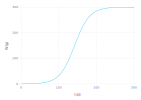

In [21]:
visualize(Logistic5, :t, :W; stop = 300u"d", kind = :line)

참고로, 여기서는 별도의 `simulate()`를 수행하지 않고 `visualize()`에 모형 명세의 이름을 직접 적어주는 것으로 `simulate()`와 `visualize()`를 동시에 수행하고 있습니다.

## 1.5. 설정 (Configuration)

위에서 처음 모수 값을 넣을 때 모형 명세에 직접 넣었던 것을 기억하시나요? 간단한 모형을 만들 때는 괜찮을 수도 있지만, 모형이 복잡해지면 점점 관리하기가 어려워지기 때문에 왠만하면 별도의 설정(configuration)으로 분리하는 것을 권장합니다. 이렇게 모수 값이 명확히 분리되어 있으면 다양한 조건의 실험을 돌릴 때 실수로 다른 모수 값을 그대로 사용하는 것과 같은 실수를 방지할 수 있습니다. 그럼 설정은 어떤 식으로 만드는지 살펴보겠습니다.

In [22]:
@system Logistic(Controller) begin
    r:  growth_rate     ~ preserve(parameter, u"g/g/d")
    Wf: final_biomass   ~ preserve(parameter, u"g")
    W0: initial_biomass ~ preserve(parameter, u"g")

    W(W, r, Wf): biomass => begin
        r * W * (1 - W / Wf)
    end ~ accumulate(init = W0, u"g")

    t(context.clock.time): time ~ track(u"d")
end

Logistic

설정을 만들기 위해서는 `@config` 매크로를 이용합니다. 기본적으로 시스템의 이름이 먼저 나오고, 그 다음 각 모수의 이름과 값이 나열되는 구조로 되어 있습니다. 여러 개의 시스템에 대한 설정을 만들 수도 있고, 모수 이름과 값을 나열하는 방식도 여러 종류가 있는데 다른 예제에서 볼 수 있을 것입니다.

In [23]:
c = @config :Logistic => (
    r  = 0.05,
    Wf = 300,
    W0 = 0.25,
)

Config for 1 system:
  Logistic
    r  = 0.05
    Wf = 300
    W0 = 0.25

각 시스템에 모수로 지정된 변수의 값을 뽑아내어 설정을 만드는 것도 가능은 합니다.

In [24]:
parameters(Logistic; alias = true)

Config for 1 system:
  Logistic
    growth_rate     = nothing
    final_biomass   = nothing
    initial_biomass = nothing

In [25]:
sim = simulate(Logistic; config = c, stop = 300u"d");

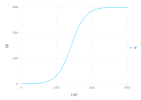

In [26]:
visualize(sim, :t, :W; kind = :line)

이렇게 설정을 사용하면 좋은 점 중의 하나는 여러 개의 작은 조각으로 나누어 관리하기 용이하다는 것입니다. 다음 시간에 보다 복잡한 예제가 나오면 만나 볼 기회가 있을 것입니다.

## 1.6. 상호작용 (Interaction)

In [27]:
Cropbox.Interact.WebIO.setup(:ijulia)

WebIO._IJuliaInit()

In [28]:
manipulate(Logistic, :t, :W;
    parameters = :Logistic => (
        r  = 0:0.01:0.2,
        Wf = 100:400,
        W0 = 0.1:0.01:1,
    ),
    stop = 300u"d",
    kind = :line,
    ylim = (0, 400),
)

WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any["Logistic"], Dict{Symbol, Any}(:style => Dict{String, Any}("color" => :darkorchid, "font-family" => "monospace"))), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Scope(WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["r"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px", "color" => :royalblue)))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 21, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget", :style => Dict("font-family" => "monospace", "width" => "25%"))), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 2 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
11, nothing)), Set{String}(), nothing, WebIO.Asset[WebIO.Asset("js", "knockout", "/Users/tomyun/.julia/packages/Knockout/3gjS1/src/../assets/knockout.js"), WebIO.Asset("js", "knockout_punches", "/Users/tomyun/.julia/packages/Knockout/3gjS1/src/../assets/knockout_punches.js"), WebIO.Asset("js", nothing, "/Users/tomyun/.julia/packages/InteractBase/o1I6G/src/../assets/all.js"), WebIO.Asset("css", nothing, "/Users/tomyun/.julia/packages/InteractBase/o1I6G/src/../assets/style.css"), WebIO.Asset("css", nothing, "/Users/tomyun/.julia/packages/Interact/pVyN2/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{WebIO.AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00000001781b9440, Task (runnable) @0x00000001781b9440), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                con

## 1.7. 모수 추정 (Calibration)

In [29]:
using DataFrames

obs = DataFrame(
    t = [100, 200, 300]u"d",
    W = [ 20, 250, 400]u"g",
)

,t,W
,Quantit…,Quantit…
1,100 d,20 g
2,200 d,250 g
3,300 d,400 g


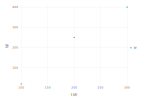

In [30]:
visualize(obs, :t, :W)

In [31]:
cc = calibrate(Logistic, obs;
    index  = :t,
    target = :W,
    parameters = :Logistic => (
        r  = (0, 1),
        Wf = (0, 500),
        W0 = (0, 10),
    ),
    stop = 300u"d",
)

Starting optimization with optimizer BlackBoxOptim.DiffEvoOpt{BlackBoxOptim.FitPopulation{Float64}, BlackBoxOptim.RadiusLimitedSelector, BlackBoxOptim.AdaptiveDiffEvoRandBin{3}, BlackBoxOptim.RandomBound{BlackBoxOptim.ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps

Optimization stopped after 5001 steps and 9.71 seconds
Termination reason: Max number of steps (5000) reached
Steps per second = 515.11
Function evals per second = 526.13
Improvements/step = 0.22420
Total function evaluations = 5108


Best candidate found: [0.0342271, 408.27, 0.68741]

Fitness: 0.025659045



Config for 1 system:
  Logistic
    r  = 0.0342271
    Wf = 408.27
    W0 = 0.68741

In [32]:
evaluate(Logistic, obs;
    index  = :t,
    target = :W,
    config = cc,
    stop = 300u"d",
    metric = :rmse,
)

0.025659045055424146 g

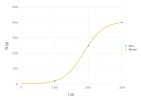

In [33]:
visualize(obs, Logistic, :t, :W;
    config = cc,
    stop = 300u"d",
    xlim = (0, 300),
    ylim = (0, 500),
    name = "Obs",
    names = ["Model"],
)

## 1.8. 내부구조 (Internals)

기술적인 내용이긴 하지만 아주 간략하게 Cropbox 모형이 어떤 식으로 구동되는지 살펴보겠습니다. 앞에서 만든 모형의 최종 명세는 아래와 같았습니다.

```julia
@system Logistic(Controller) begin
    r:  growth_rate     ~ preserve(parameter, u"g/g/d")
    Wf: final_biomass   ~ preserve(parameter, u"g")
    W0: initial_biomass ~ preserve(parameter, u"g")

    W(W, r, Wf): biomass => begin
        r * W * (1 - W / Wf)
    end ~ accumulate(init = W0, u"g")

    t(context.clock.time): time ~ track(u"d")
end
```

시스템 내에 선언된 변수들의 관계도는 `Cropbox.dependency()` 함수를 이용하여 확인해볼 수 있습니다.

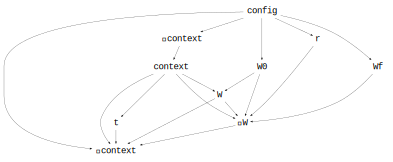

In [34]:
Cropbox.dependency(Logistic)

`A`에서 `B`로 향하는 화살표는 `B`가 `A`에 의존하고 있다는 의미입니다. 다시 말해서 `B`를 계산하기 위해서는 `A`의 값이 필요하다는 의미이죠.

위 그래프에서 일부 변수는 $\circ$이나 $\star$와 같은 표식이 덧붙여진 다수의 노드로 구성되어 있는 것을 볼 수 있습니다. 각 변수들이 어떤 식으로 이러한 관계를 가지게 되는지는 해당 변수를 선언할 때 지정해준 *패턴*에 의해 결정됩니다.

예를 들어 `parameter` 속성(*예:* `W0`, `Wf`)을 가지고 있는 `preserve` 계통의 변수는 해당 모수 값을 읽기 위하여 설정 값이 담겨 있는 `config` 객체를 참조해야만 합니다.

`accumulate` 계통의 변수를 처리하기 위해서는 내부적으로 2단계의 구현이 필요합니다. 첫번째는 직전 시간에 계산해놓은 적산값을 현재 시간에 반영하는 것, 두번째는 현재 시간의 상태에 맞추어 새로운 적산값을 계산하여 다음 시간에 사용될 수 있도록 넘겨주는 것입니다. 예를 들어 위의 그래프에서 `W`는 전자, `⋆W`는 후자를 나타내고 있습니다.

참고로 `config`는 `context`와 함께 모든 시스템이 내부적으로 가지고 있는 구조체입니다. `config`는 이름 그대로 설정을 저장하고 있으며, `context`는 시스템끼리 공유가 필요한 정보, 특히 시간을 관장하는 `Clock` 시스템을 보유하고 있습니다.

In [35]:
display("text/plain", Cropbox.dependency(Logistic))

[config → W0 → Wf → r → ∘context → context → t → W → ⋆W → ⋆context]

위의 의존성 그래프(dependency graph)는 변수들 간의 계산 순서를 결정하는데 핵심적인 역할을 수행합니다. 모형 명세에서 실제 생성되는 코드를 살펴보도록 하겠습니다. Julia가 제공하는 `@macroexpand` 매크로를 사용합니다.

In [36]:
@macroexpand @system Logistic(Controller) begin
    r:  growth_rate     ~ preserve(parameter, u"g/g/d")
    Wf: final_biomass   ~ preserve(parameter, u"g")
    W0: initial_biomass ~ preserve(parameter, u"g")

    W(W, r, Wf): biomass => begin
        r * W * (1 - W / Wf)
    end ~ accumulate(init = W0, u"g")

    t(context.clock.time): time ~ track(u"d")
end

quote
    #= /Users/tomyun/.julia/packages/Cropbox/DLhVf/src/macro.jl:413 =#
    begin
        $(Expr(:meta, :doc))
        abstract type Logistic <: System end
    end
    #= /Users/tomyun/.julia/packages/Cropbox/DLhVf/src/macro.jl:414 =#
    Logistic(; var"#934#kw"...) = begin
            #= /Users/tomyun/.julia/packages/Cropbox/DLhVf/src/macro.jl:414 =#
            var"##_Logistic#386"(; var"#934#kw"...)
        end
    #= /Users/tomyun/.julia/packages/Cropbox/DLhVf/src/macro.jl:415 =#
    (Cropbox.Cropbox).typefor(::Cropbox.Type{<:Logistic}) = begin
            #= /Users/tomyun/.julia/packages/Cropbox/DLhVf/src/macro.jl:415 =#
            var"##_Logistic#386"
        end
    #= /Users/tomyun/.julia/packages/Cropbox/DLhVf/src/macro.jl:416 =#
    let var"#932###CS#391" = Cropbox.merge(Cropbox.constsof.(Cropbox._mixincollect(Cropbox.mixinsof(Main, [:System, :Controller])))..., Cropbox.Dict(:__Context__ => Cropbox.typefor(Cropbox.Context))), var"#933#__Context__" = var"#932###CS#391"[:

굉장히 복잡해보이지만 상당 부분의 코드는 실제 컴파일되는 과정에서 Julia 컴파일러의 최적화 과정을 거쳐 단순한 코드로 바뀌게 됩니다. 각 시스템은 `struct` 타입(type)으로 표현되며 `update()`와 같은 내부 함수가 실제 계산 과정을 담당하게 됩니다. `simulate()` 함수는 내부적으로 이러한 구조체의 실제 정보를 담아둘 객체(instance)를 생성하고 관련 함수들을 순서에 맞게 호출하는 방식으로 모의를 수행하는 것입니다. 기술적으로 상세한 내용은 굳이 몰라도 Cropbox를 사용하는 것에 전혀 지장이 없으며, 그러한 점이 Cropbox를 사용하는 목적 중의 하나라고 보실 수도 있겠습니다. 굳이 위와 같은 코드를 직접 만들지 않아도 되는 것이죠.

이번 시간에 다룬 모형은 아주 간단하기 때문에 1개의 단일 시스템으로 구성되어 있었습니다. 조금 더 복잡한 모형들은 보다 편리한 관리를 위해 작은 명세로 나누어진 다수의 시스템으로 구성되어 있는 경우가 많은데, 이러한 작은 단위의 명세를 믹스인(mix-in)이라는 용어로 부르기도 합니다.

눈치채셨을 수도 있겠지만 `Logistic` 시스템의 경우 명세를 정의할 때 항상 `Controller`라는 믹스인을 포함하고 있었습니다.

```julia
@system Logistic(Controller) begin
    ..
end
```

`Controller` 믹스인은 위에서 잠깐 언급되었듯 다른 시스템과 공유되는 `config`와 `context`를 초기화해주는 역할을 맡고 있습니다. 다시 말해서 `simluate()`의 대상이 되기 위해서는 `Controller` 믹스인이 항상 마지막에 포함되어야 합니다. 이러한 관계는 `Cropbox.hierarchy()` 함수를 통해 그려볼 수 있습니다.

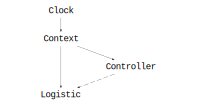

In [37]:
Cropbox.hierarchy(Logistic)